<a href="https://colab.research.google.com/github/gaggs/Machine-Learning-Projects/blob/master/Superstore_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [4]:
data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [5]:
data.tail(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.60,4,0.0,13.320
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [6]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [10]:
data["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

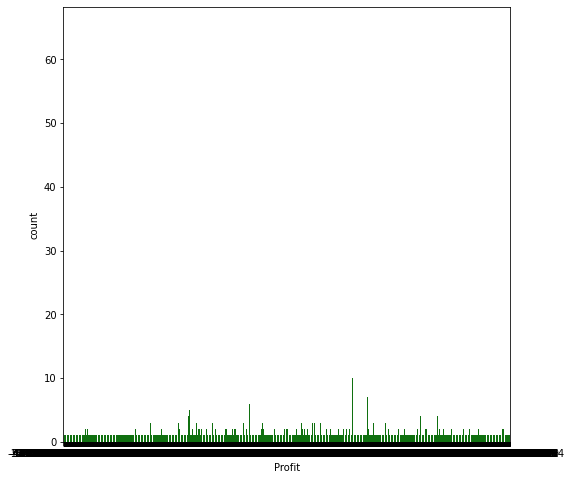

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(data["Profit"],color='g')

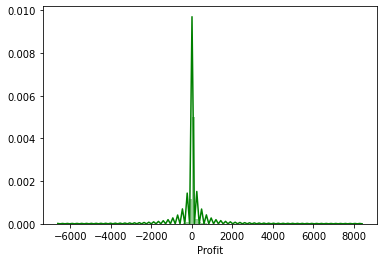

In [23]:
sns.distplot(data['Profit'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [26]:
list(set(data.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [27]:
data_num=data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa275ecf6a0>,
      dtype=object)

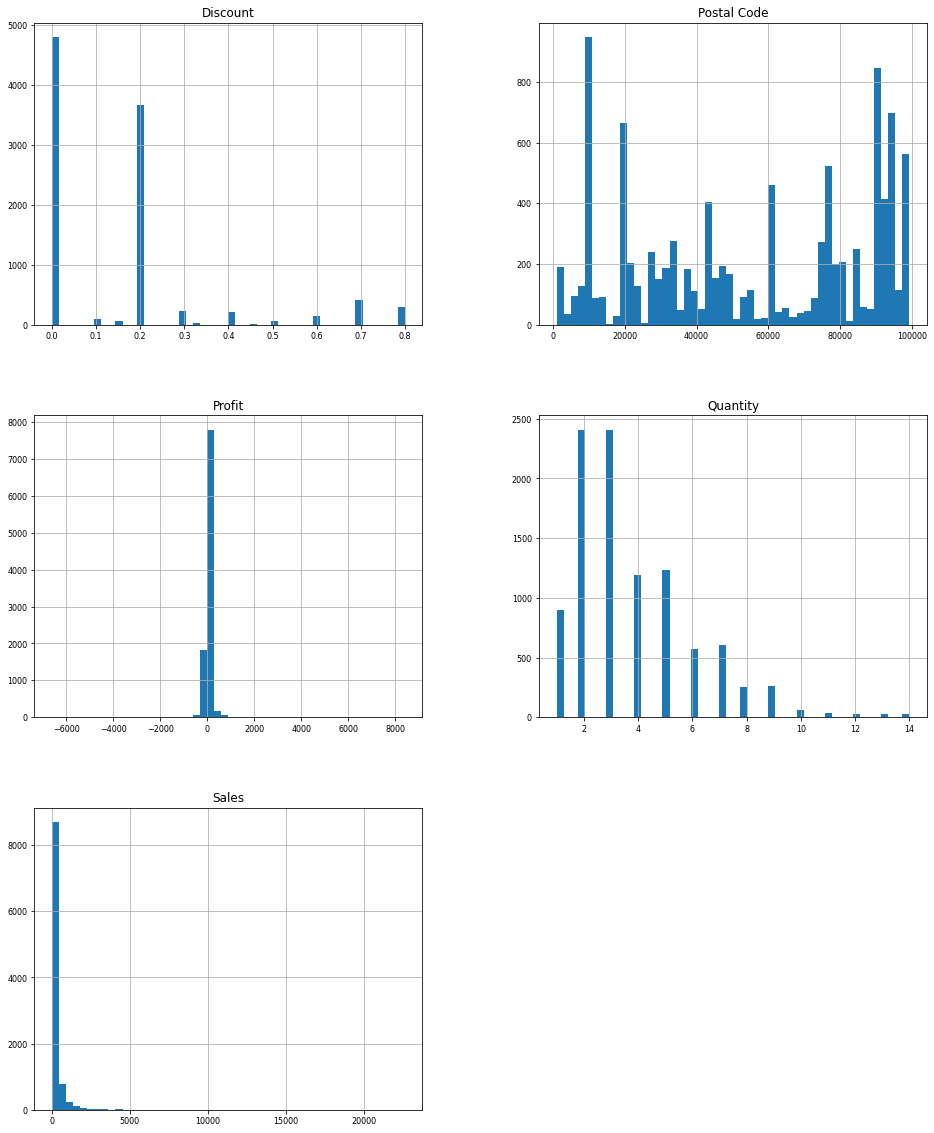

In [28]:
data_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

In [39]:
data_num_corr=data_num.corr()['Profit'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Profit:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Profit:
Sales    0.479064
Name: Profit, dtype: float64


In [46]:
data_num_corr=data_num.corr()['Sales'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Sales:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Sales:
Sales    1.0
Name: Sales, dtype: float64


In [44]:
data_num_corr=data_num.corr()['Discount'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Discount:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Discount:
Discount    1.0
Name: Discount, dtype: float64


In [42]:
data_num_corr=data_num.corr()['Quantity'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Quantity:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Quantity:
Quantity    1.0
Name: Quantity, dtype: float64


In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Pro'])

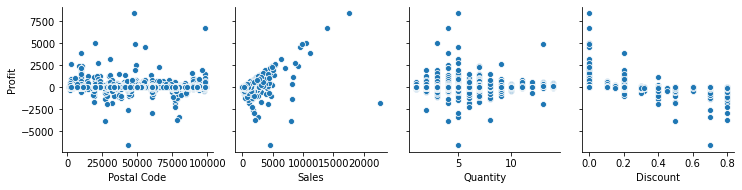

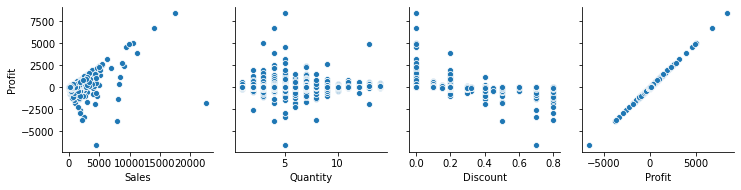

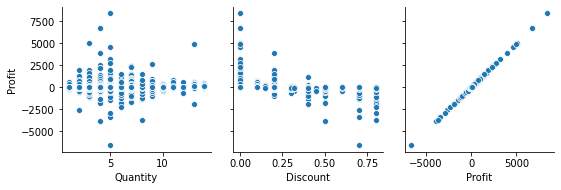

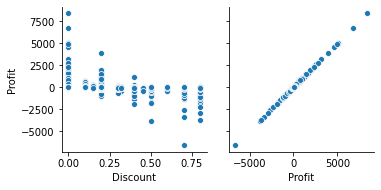

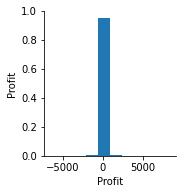

In [52]:
for i in range(0,len(data.columns)):
  sns.pairplot(data=data_num,x_vars=data_num.columns[i:i+4],y_vars=["Profit"])